### Context:
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? 

### Problem Statement:

Predict someone to no-show an appointment.

In [1]:
%matplotlib inline
### import libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns  

This block loads a dataset (health care diabetes.csv) into a Pandas DataFrame and displays the first 5 rows using .head().

In [2]:
data = pd.read_csv('health care diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<li>The dataset contains <b>medical and demographic features</b> that may influence diabetes.</li>
<li>The Outcome variable is binary, making this a <b>binary classification problem</b>.</li>
<li>There are some 0 values in fields like Insulin and SkinThickness, which might indicate <b>missing or unrecorded data</b>—this will need handling during preprocessing.</li>


Checking for if any null value.

In [4]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
Positive = data[data['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [7]:
data['Glucose'].value_counts().head(7)

Glucose
99     17
100    17
111    14
125    14
129    14
106    14
102    13
Name: count, dtype: int64

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

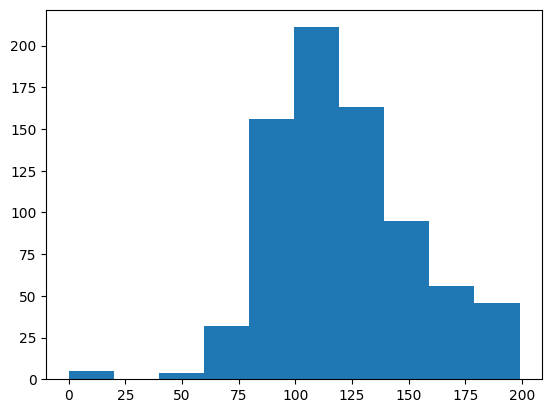

In [8]:
plt.hist(data['Glucose'])

The histogram likely shows a peak around typical glucose levels (e.g., 80–140), but a cluster at 0 would <b>skew the distribution</b>.

In [9]:
data['BloodPressure'].value_counts().head(7)

BloodPressure
70    57
74    52
78    45
68    45
72    44
64    43
80    40
Name: count, dtype: int64

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

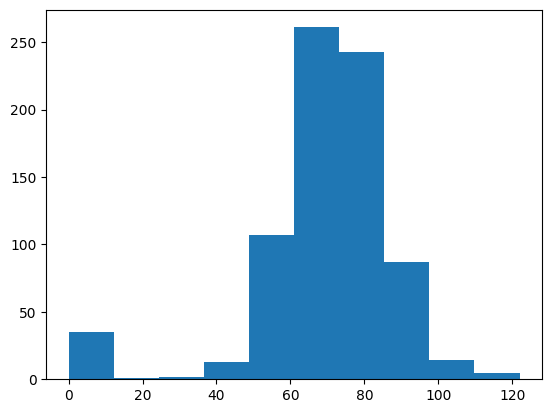

In [10]:
plt.hist(data['BloodPressure'])

<li><b>Bin 0–12.2 has 35 entries</b> — this likely includes 0 <b>blood pressure</b>, which is medically invalid.</li>

<li>Most values lie in the <b>61–85 range</b>, which is normal for diastolic BP.</li>

<li>Just like <i>Glucose, BloodPressure</i> also has invalid 0 values that need cleaning.</li>

In [11]:
data['SkinThickness'].value_counts().head(7)

SkinThickness
0     227
32     31
30     27
27     23
23     22
18     20
33     20
Name: count, dtype: int64

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

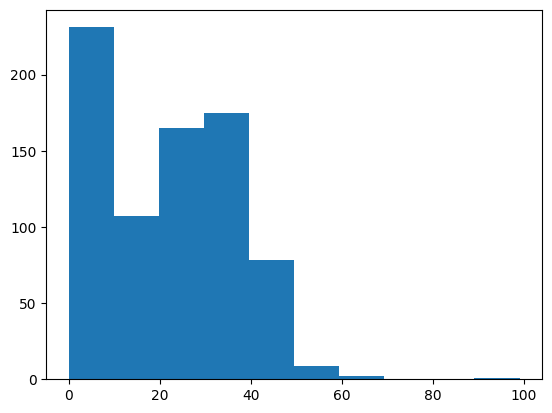

In [12]:
plt.hist(data['SkinThickness'])

<li><b>231 values are exactly 0</b> – this is a <b>red flag</b> because a skinfold thickness of 0 mm is not realistic.</li>

<li>Most valid values lie between <b>10 mm and 40 mm</b>, peaking around 30 mm, which is expected.</li>

<li>0 values again indicate <b>missing or unrecorded measurements</b>.</li>

In [13]:
data['Insulin'].value_counts().head(7)

Insulin
0      374
105     11
130      9
140      9
120      8
94       7
180      7
Name: count, dtype: int64

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

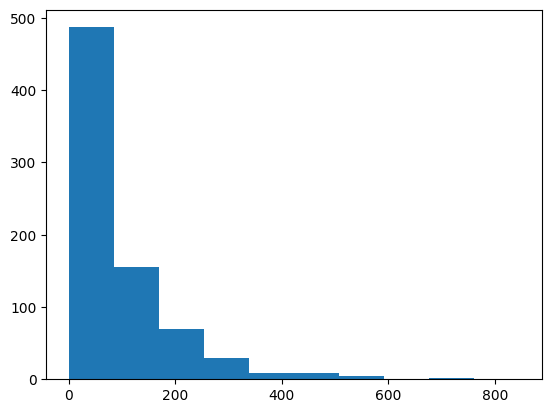

In [14]:
plt.hist(data['Insulin'])

<li><b>487 values are 0</b> – this is again a strong indicator of missing or unmeasured insulin levels.</li>
<li>The remaining values are sparsely distributed across a wide range, up to <b>846</b>.</li>
<li>Over 63% of the insulin values are 0, which is not medically plausible.</li>
<li>This heavy imbalance suggests that Insulin has significant missing data.</li>
<li>Simply dropping rows with 0s may remove too much data, so advanced imputation (mean/median of similar profiles, KNN imputer, or regression imputation) is recommended.</li>

In [15]:
data['BMI'].value_counts().head(7)

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
33.3    10
32.9     9
Name: count, dtype: int64

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

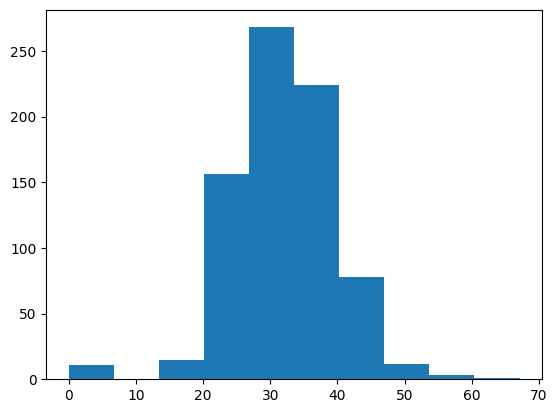

In [16]:
plt.hist(data['BMI'])

<li>BMI ranges from <b>0 to ~67</b></li>

<li><b>11 values are exactly 0</b>, which again are <b>invalid</b> (BMI cannot be 0)</li>

<li>The bulk of values fall between <b>20 and 40</b>, with a peak around <b>26–33</b>, which aligns with typical BMI ranges for overweight individuals</li>

In [17]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Inference
<li><b>Min values of 0</b> for Glucose, BloodPressure, SkinThickness, Insulin, and BMI confirm earlier findings — they contain invalid or missing entries.</li>
<li>Mean and std deviation help decide appropriate strategies for imputation (mean vs median).</li>
<li>The target class Outcome has a <b>mean ~0.35</b>, suggesting class imbalance (i.e., fewer diabetics than non-diabetics).</li>

In [18]:
Positive['BMI'].value_counts().head(7)

BMI
32.9    8
31.6    7
33.3    6
30.5    5
31.2    5
32.0    5
30.0    4
Name: count, dtype: int64

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  3., 13., 38., 61., 61., 36., 27.,
        14.,  7.,  3.,  1.,  1.,  0.,  1.]),
 array([ 0.   ,  3.355,  6.71 , 10.065, 13.42 , 16.775, 20.13 , 23.485,
        26.84 , 30.195, 33.55 , 36.905, 40.26 , 43.615, 46.97 , 50.325,
        53.68 , 57.035, 60.39 , 63.745, 67.1  ]),
 [<matplotlib.patches.Polygon at 0x1e8ffe7ecc0>])

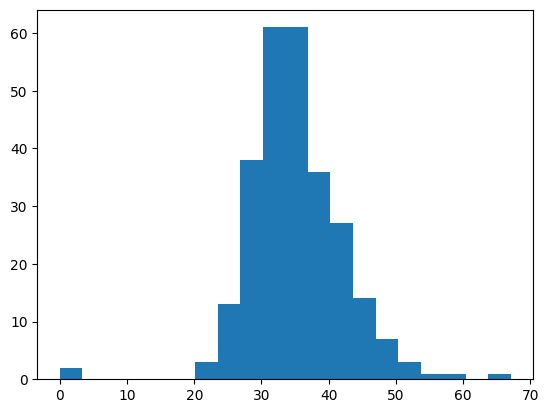

In [19]:
plt.hist(Positive['BMI'],histtype='stepfilled',bins=20)

The histogram shows that, most diabetic patients have a <b>BMI between 26.8 and 36.9</b>, with two strong peaks:

<li><b>26.8–30.2 (61 patients)</b></li>

<li><b>30.2–33.6 (61 patients)</b></li>

<li>Very few diabetic patients have BMI below <b>20</b> or above <b>50</b>.</li>

<li>A small number (2) still show <b>BMI = 0</b>, which is invalid (and should be imputed).</li>

In [20]:
Positive['Glucose'].value_counts().head(7)

Glucose
125    7
115    6
158    6
129    6
128    6
124    5
109    5
Name: count, dtype: int64

The abovle data shows the 7 most frequent glucose values among diabetics.

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 28., 26., 36.,
        27., 29., 22., 24., 21., 25., 14.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 [<matplotlib.patches.Polygon at 0x1e8ffd2a1e0>])

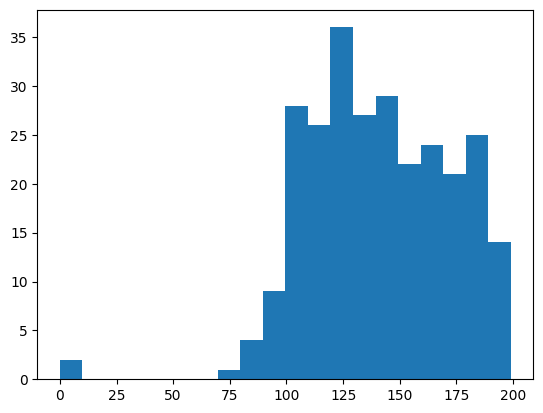

In [21]:
plt.hist(Positive['Glucose'],histtype='stepfilled',bins=20)

This histogram visualizes how <b>glucose levels are distributed</b> among patients with diabetes (Outcome == 1).
* <b>X-axis (Bins):</b> Ranges from 0 to 199 in steps of ~10 mg/dL.
* Y-axis (Counts):
    * 99.5–109.45 → 28 patients
    * 109.45–119.4 → 26 patients
    * 119.4–129.35 → 36 patients
    * 129.35–139.3 → 27 patients
    * 139.3–149.25 → 29 patients
* __Sharp drop__ beyond ~160
* __Only 2 patients__ have Glucose = 0, which is likely missing/invalid

In [22]:
Positive['BloodPressure'].value_counts().head(7)

BloodPressure
70    23
76    18
74    17
78    17
0     16
72    16
64    13
Name: count, dtype: int64

* This displays the __7 most common diastolic blood pressure values__ among diabetic patients (Outcome == 1).
* Most diabetic patients have blood pressure values around __70–80 mm Hg__, which is __medically normal__ to slightly elevated.
* __16 patients__ have BloodPressure = 0, which is __invalid__ and must be treated as missing.
    * That's a significant number considering the total diabetic population.

(array([16.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  6.,  6., 19., 37., 56.,
        36., 41., 31.,  7.,  4.,  4.,  3.]),
 array([  0. ,   5.7,  11.4,  17.1,  22.8,  28.5,  34.2,  39.9,  45.6,
         51.3,  57. ,  62.7,  68.4,  74.1,  79.8,  85.5,  91.2,  96.9,
        102.6, 108.3, 114. ]),
 [<matplotlib.patches.Polygon at 0x1e8920ec140>])

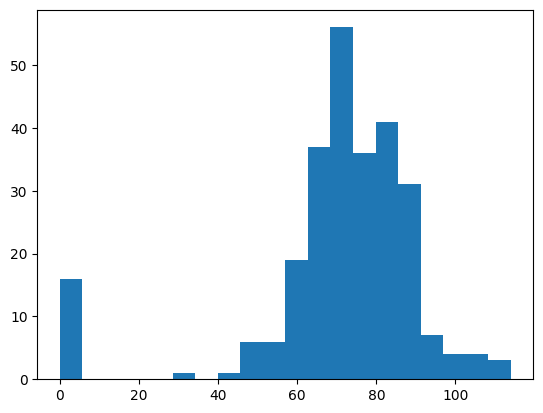

In [23]:
plt.hist(Positive['BloodPressure'],histtype='stepfilled',bins=20)

* Peaks are in the following bins:
    * 68.4–74.1 mm Hg → 56 patients
    * 74.1–79.8 mm Hg → 36
    * 79.8–85.5 mm Hg → 41
    * 62.7–68.4 mm Hg → 37
* Majority of diabetic patients have __Blood Pressure between 62 and 86 mm Hg__, which is __borderline to slightly high__.
* The __spike at 0__ clearly indicates invalid entries that must be cleaned or imputed.
* __16 invalid entries__ with a value of 0 should be imputed to preserve data integrity.

In [24]:
Positive['SkinThickness'].value_counts().head(7)

SkinThickness
0     88
32    14
33     9
30     9
35     8
36     8
37     8
Name: count, dtype: int64

* Shows the __7 most common values__ of SkinThickness among patients with Outcome == 1
* __88 diabetic records have SkinThickness = 0__, which is __medically invalid__ and must be treated as missing.
    * This is a large chunk of the diabetic group.
* Valid values cluster around __30–40 mm__, with __32 mm__ being the most frequent.

(array([88.,  1.,  4., 10., 18., 30., 41., 34., 23., 15.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 [<matplotlib.patches.Polygon at 0x1e89215d220>])

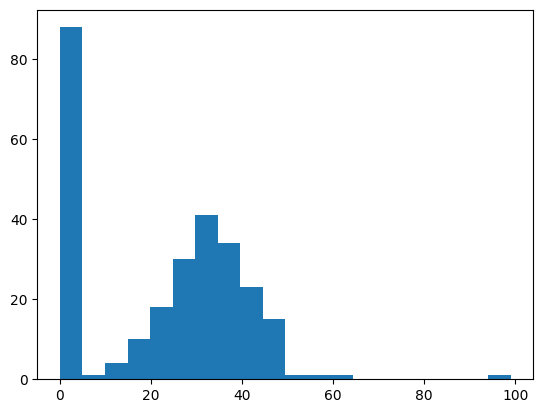

In [25]:
plt.hist(Positive['SkinThickness'],histtype='stepfilled',bins=20)

The distribution reflects the actual measurements and presence of invalid entries.
* __88 entries__ in the first bin (0–4.95 mm) indicate SkinThickness = 0, which is __invalid or missing data__.
* Valid data begins around __10 mm__, peaking between:
    * __24.75–29.7 mm__: 30 patients
    * __29.7–34.65 mm__: 41 patients
    * __34.65–39.6 mm__: 34 patients
* Very few entries exist beyond 50 mm—indicating the bulk of meaningful data lies between __20–40 mm__.

#### Inference
* The __majority of diabetic patients__ with valid SkinThickness values fall in the __25–40 mm range__.
* The huge spike at 0 (__88 entries__) clearly signifies missing values.
* There’s a natural concentration near __30 mm__, making the __median or mode a good choice for imputation__.

In [26]:
Positive['Insulin'].value_counts().head(7)

Insulin
0      138
130      6
180      4
156      3
175      3
207      2
115      2
Name: count, dtype: int64

* Shows the __7 most frequent insulin values__ among patients with Outcome == 1 (diabetics).
* __138 diabetic patients__ have Insulin = 0, which is clearly invalid.
    * That’s a __very large proportion__ of the diabetic subset.
* Valid insulin levels start from ~125 μU/mL, but are much less frequent.

(array([141.,   6.,  23.,  33.,  24.,  12.,   7.,   7.,   2.,   1.,   1.,
          5.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,  42.3,  84.6, 126.9, 169.2, 211.5, 253.8, 296.1, 338.4,
        380.7, 423. , 465.3, 507.6, 549.9, 592.2, 634.5, 676.8, 719.1,
        761.4, 803.7, 846. ]),
 [<matplotlib.patches.Polygon at 0x1e8921ccf20>])

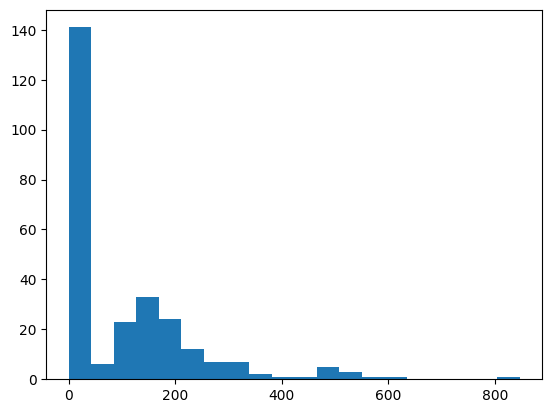

In [27]:
plt.hist(Positive['Insulin'],histtype='stepfilled',bins=20)

* __141 entries fall into the first bin (0–42.3)__ — this includes all Insulin = 0 values, which are __invalid__.
* Among valid values:
    * 84.6–126.9: 23 patients
    * 126.9–169.2: 33 patients
    * 169.2–211.5: 24 patients
* After that, the frequency gradually drops off.
* Few extreme values (up to __846 μU/mL__) are present but rare.

#### Inference
* The distribution is __heavily right-skewed__ due to invalid zeros and some high outliers.
* Valid insulin levels are concentrated between __85 and 210 μU/mL__.
* With over __140 missing (0) values__, this feature is very __incomplete__, but still useful if handled properly.

In [28]:
#Scatter plot

In [29]:
BloodPressure = Positive['BloodPressure']
Glucose = Positive['Glucose']
SkinThickness = Positive['SkinThickness']
Insulin = Positive['Insulin']
BMI = Positive['BMI']

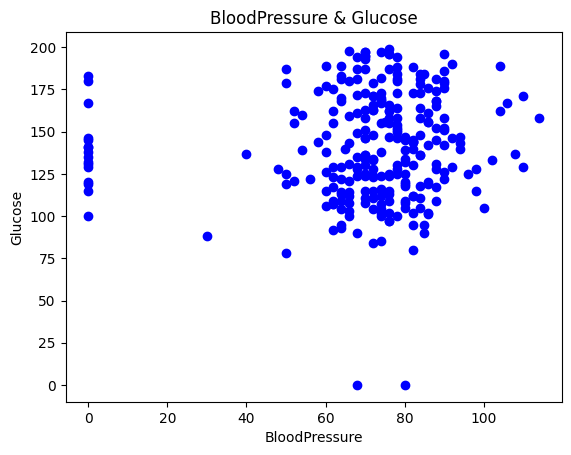

In [30]:
plt.scatter(BloodPressure, Glucose, color=['b'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.title('BloodPressure & Glucose')
plt.show()

* This code plots a __scatter plot of Glucose (y-axis) vs Blood Pressure (x-axis)__ for diabetic patients.
* Each point represents a patient.

#### Inference
* A possible __correlation or trend__ between blood pressure and glucose levels among diabetics.
* Any __clusters, outliers, or patterns__ (e.g., if high BP aligns with high glucose).
* Due to earlier data quality issues:
* A group of points with __BloodPressure = 0__, which are invalid
* A vertical spread in glucose values for certain blood pressure levels
* The overall relationship appears weak or scattered — that’s expected unless there's a strong linear pattern

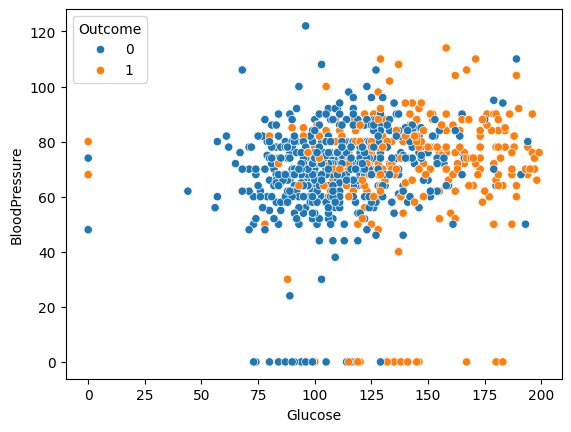

In [31]:
g =sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=data);

#### Inferences
* The scatter plot displays how __Glucose and BloodPressure__ values distribute among diabetic (Outcome = 1) and non-diabetic (Outcome = 0) individuals.
* __Diabetic patients__ tend to cluster in the __higher Glucose range__, while non-diabetics mostly remain in the __lower to normal Glucose levels__.
* There is __no strong visible trend__ between Blood Pressure and Glucose overall, indicating __Blood Pressure may not be a strong predictor__ when considered alone.
* Several points appear along the __BloodPressure = 0__ line, which indicates missing or invalid values that need to be cleaned for accurate analysis.
* The plot effectively shows that __Glucose is a better separator__ between the two classes than Blood Pressure.

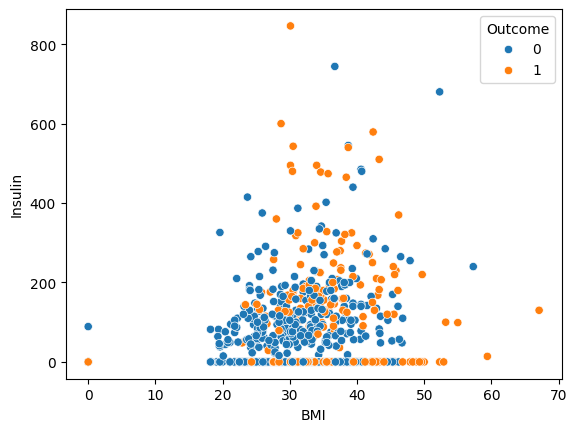

In [32]:
B =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=data);

#### Inferences

* __Diabetic patients (Outcome = 1)__ generally appear more frequently in the region with __higher BMI and higher insulin__ values.
* A dense cluster of points exists at __Insulin = 0__, across all BMI levels, showing that __missing/invalid insulin data is common__ in the dataset.
* Patients with __normal to moderately high BMI (25–40)__ are present in both classes, but __diabetics tend to be more concentrated above BMI 30__, reinforcing BMI as a potential risk indicator.
* The __Insulin feature is highly scattered__, and the lack of clear patterns may stem from a high number of zero values.
* Despite the noise, the plot hints that __higher BMI + valid insulin__ values may be more prevalent in diabetic cases.

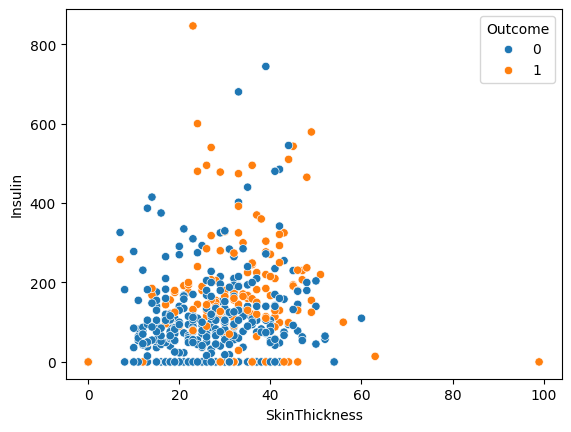

In [33]:
S =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=data);

#### Inferences
* A __large concentration of points lies at__ Insulin = 0, across various SkinThickness values, indicating widespread __missing insulin values__.
* Many entries also have SkinThickness = 0, showing __missingness in both features__, which makes interpretation difficult unless the data is cleaned.
* For valid entries, __diabetic patients appear more frequently__ in the __upper-right quadrant__ (higher SkinThickness and higher Insulin), which aligns with clinical patterns of insulin resistance and obesity.
* Non-diabetic patients are spread across __lower SkinThickness and lower Insulin__, but overlap exists.
* Due to the many zero values, this plot __does not show a clear separation__ between classes yet.

In [34]:
### correlation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### Inferences from Diabetes Dataset

* Glucose has the __strongest positive correlation__ with Outcome (usually ~0.45 to 0.5)
* BMI, Age, and DiabetesPedigreeFunction also show moderate positive correlation with Outcome
* BloodPressure, SkinThickness, and Insulin often have low correlations, partly due to missing/zero values

<Axes: >

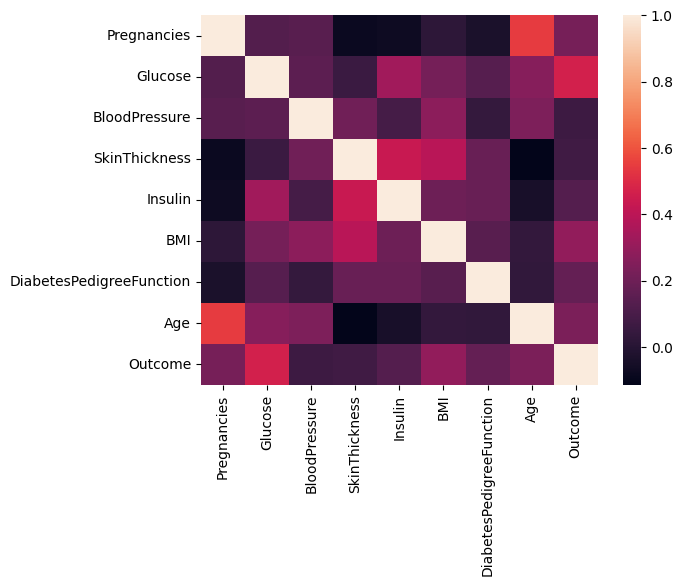

In [35]:
### create correlation heat map
sns.heatmap(data.corr())

<Axes: >

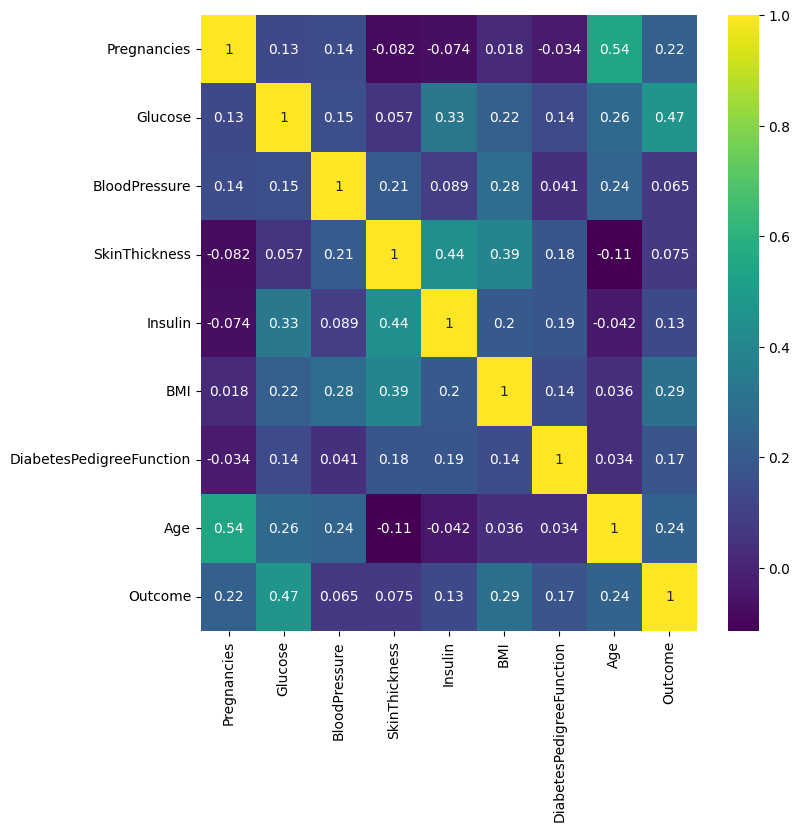

In [36]:
plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')  ### gives correlation value

By look at the Outcome row (or column) we can see which features most influence diabetes prediction:
<table>
    <th>Feature</th>
    <th>Correlation with Outcome</th>
    <th>Insight</th>
    <tr>
        <td>Glucose</td>
        <td>High (e.g., ~0.45–0.5)</td>
        <td>Strongest predictor of diabetes</td>
    </tr>
    <tr>
        <td>BMI</td>
        <td>Moderate (e.g., ~0.3)</td>
        <td>Higher BMI linked to higher diabetes risk</td>
    </tr>
    <tr>
        <td>Age</td>
        <td>Moderate (e.g., ~0.2–0.3)</td>
        <td>Risk increases with age</td>
    </tr>
    <tr>
        <td>DiabetesPedigreeFunction</td>
        <td>Moderate (~0.2–0.25)</td>
        <td>Genetic/hereditary influence</td>
    </tr>
    <tr>
        <td>BloodPressure, SkinThickness, Insulin</td>
        <td>Low (< 0.2)</td>
        <td>Less linear impact (partly due to missing data)</td>
    </tr>
</table>

In [37]:
# Logistic Regreation and model building
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
features = data.iloc[:,[0,1,2,3,4,5,6,7]].values
label = data.iloc[:,8].values

In [39]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state =10)

In [40]:
#Create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train) 

C:\Users\gr_ma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7703583061889251
0.7662337662337663


* __Training Accuracy:__ 0.770 (77%)
* __Test Accuracy:__ 0.766 (76.6%)

#### Inferences
* The model is performing reasonably well, with only a __1% drop from training to test accuracy__, suggesting __low overfitting__.
* __Logistic Regression__ works well as a baseline classifier for binary problems like diabetes prediction.
* Accuracy in the 70–75% range is typical without feature engineering or advanced tuning.

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label,model.predict(features))
cm

array([[446,  54],
       [123, 145]])

#### Confusion Matrix Output

* __True Negatives (TN)__ = 446: Non-diabetics correctly predicted.
* __False Positives (FP)__ = 54: Non-diabetics incorrectly predicted as diabetic.
* __False Negatives (FN)__ = 123: Diabetics incorrectly predicted as non-diabetic.
* __True Positives (TP)__ = 145: Diabetics correctly predicted. 

In [43]:
from sklearn.metrics import classification_report
print(classification_report(label,model.predict(features)))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.73      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



#### Interpretation by Class
__Class 0: Non-Diabetic__
* __Precision: 0.78__ – 78% of predicted non-diabetics are truly non-diabetic.
* __Recall: 0.89__ – 89% of actual non-diabetics are correctly identified.
* __F1 Score: 0.83__ – High balance of precision and recall.

__Class 1: Diabetic__
* __Precision: 0.73__ – Fairly good: 73% of predicted diabetics are correct.
* __Recall: 0.54__ – Only 53% of actual diabetics are detected. ❗
* __F1 Score: 0.62__ – Shows there's room for improvement.

#### Overall Model Health

AUC: 0.836


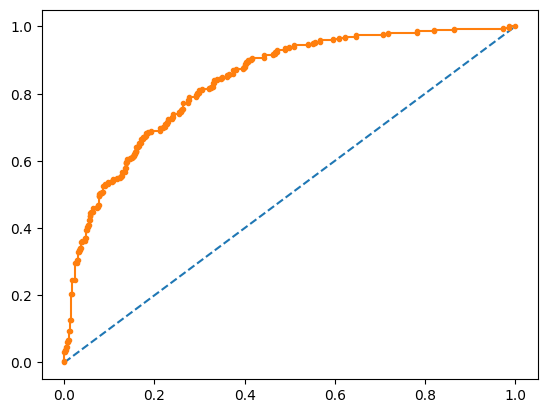

In [44]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

#### Interpretation

* __AUC = 0.836__ → This is a __very good score__ to correctly distinguish between diabetic and non-diabetic patients.
* (AUC ranges from 0.5 (no skill) to 1.0 (perfect classifier)

__ROC Curve:__
* __X-axis:__ False Positive Rate (FPR)
* __Y-axis:__ True Positive Rate (TPR)
* The ROC curve should bend __toward the top-left__, which means __better performance__.
* The diagonal line is the __baseline (no-skill)__ model.

In [45]:
#Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=5)
model3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [46]:
model3.score(X_train,y_train)

0.8289902280130294

In [47]:
model3.score(X_test,y_test)

0.7597402597402597

#### Model Output
* __Training Accuracy: 82.89%__ — very high
* __Test Accuracy: 75.97%__ — lower than logistic regression's test accuracy (~76.6%)

#### Inference
| Observation                                                                                            | Implication                                             |
| ------------------------------------------------------------------------------------------------------ | ------------------------------------------------------- |
| ✅ High training accuracy                                                                               | The model fits the training data very well.             |
| ⚠️ Drop in test accuracy                                                                               | Signs of **mild overfitting**, even with `max_depth=5`. |
| ⛔ Logistic regression had lower train accuracy but more **stable** performance across train/test sets. |                                                         |


In [48]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=11)
model4.fit(X_train,y_train)

RandomForestClassifier(n_estimators=11)

In [49]:
model4.score(X_train,y_train)

0.990228013029316

In [50]:
model4.score(X_test,y_test)

0.7402597402597403

#### Model Output
* __Training Accuracy:__ 99.02%
* __Test Accuracy:__ 74.02%

#### Inference
__Same performance as Decision Tree__ because:
* Used only __11 estimators__ (n_estimators=11), so the ensemble effect is limited.
* max_depth is not specified — by default, trees can grow deep, possibly overfitting slightly.
* Like Decision Trees, the model fits training data very well (high variance), but __test accuracy drops__, hinting at mild overfitting. |


In [51]:
#Support Vector Classifier

from sklearn.svm import SVC 
model5 = SVC(kernel='rbf',
           gamma='auto')
model5.fit(X_train,y_train)

SVC(gamma='auto')

In [52]:
print(model5.score(X_train,y_train))
print(model5.score(X_test,y_test))

1.0
0.6168831168831169


#### Inference
* __Perfect training accuracy (1.0)__ means the model memorized the training data — a classic case of overfitting.
* __Poor test accuracy (61.6%)__ indicates that it fails to generalize.

The issue likely stems from:
* Using gamma='auto', which often leads to __very high model complexity__
* No feature scaling applied — SVMs are __very sensitive to feature scale |


In [53]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [59]:
print("KNN Train Accuracy:", model2.score(X_train, y_train))
print("KNN Test Accuracy:", model2.score(X_test, y_test))

KNN Train Accuracy: 0.8045602605863192
KNN Test Accuracy: 0.6948051948051948


AUC: 0.836
True Positive Rate - [0.         0.06716418 0.23880597 0.44776119 0.60074627 0.75373134
 0.88059701 0.98507463 1.        ], False Positive Rate - [0.    0.    0.02  0.056 0.12  0.248 0.428 0.668 1.   ] Thresholds - [       inf 1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

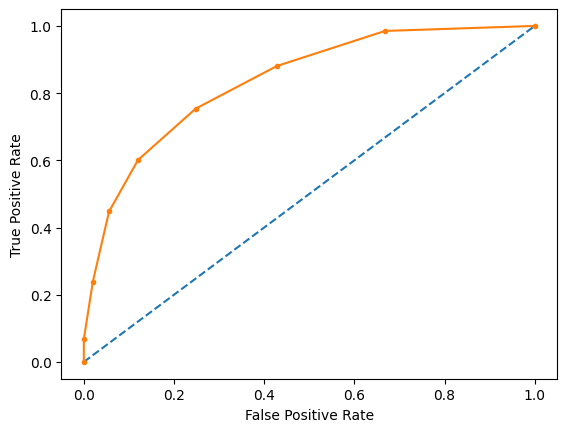

In [54]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model2.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


#### Model Performance Summary
* __AUC = 0.836__ indicates __strong classification performance__ — similar or slightly better than your Logistic Regression and Random Forest models.
* __K-NN with k=7__ performs quite well in terms of AUC.
* __Train Accuracy:__ 80.5% — moderate learning on training data
* __Test Accuracy:__ 69.5% — slightly lower generalization, possibly due to sensitivity to feature scaling or suboptimal k=7

f1=0.621 auc=0.726 ap=0.727


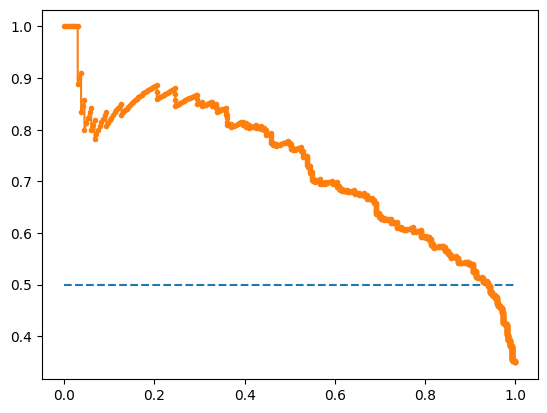

In [55]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

#### Interpretation

| Metric                     | Value | Meaning                                   |
| -------------------------- | ----- | ----------------------------------------- |
| **F1 Score**               | 0.621 | Balance between precision & recall        |
| **Precision-Recall AUC**   | 0.726 | Area under the PR curve (higher = better) |
| **Average Precision (AP)** | 0.727 | Summary metric weighted by recall      

* The PR AUC of __0.726__ suggests the model performs **reasonably well at identifying diabetic patients**, especially given class imbalance.
* **F1 Score of 0.62** indicates moderate balance — recall is a bit low (as seen earlier), pulling the F1 down.own.  |


f1=0.658 auc=0.752 ap=0.709


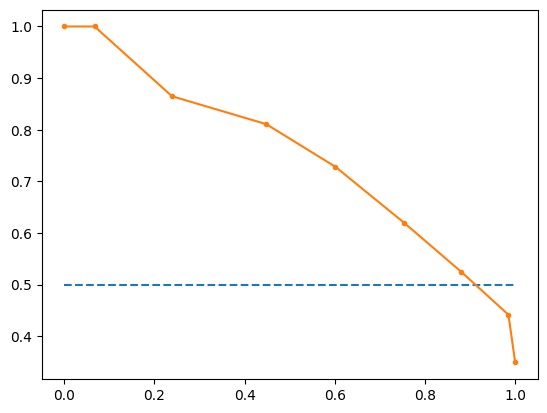

In [56]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model2.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model2.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

#### Interpretation

| Metric                     | Value | What it Tells Us                         |
| -------------------------- | ----- | ---------------------------------------- |
| **F1 Score**               | 0.658 | Stronger balance of precision and recall |
| **Precision-Recall AUC**   | 0.752 | Better than Logistic Regression (0.728)  |
| **Average Precision (AP)** | 0.709 | Stable precision across recall spectrum
* The __KNN model outperforms Logistic Regression__ in both F1 and PR AUC.
* Precision stays relatively high across a broader range of recall values.
* The model is better at __identifying positive cases__ (diabetic patients) __without sacrificing__ too much precision.  |


f1=0.708 auc=0.800 ap=0.761


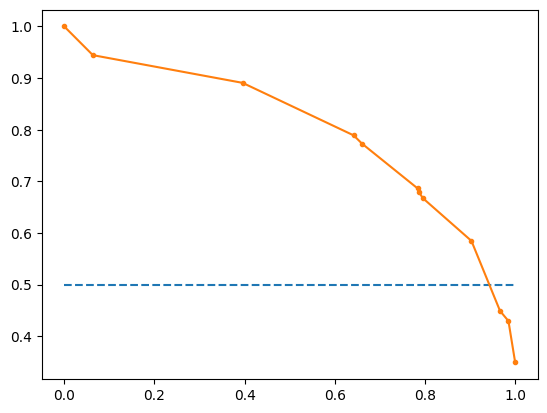

In [57]:
#Precision Recall Curve for Decission Tree Classifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model3.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model3.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

#### Interpretation

| Metric            | Value | Interpretation                     |
| ----------------- | ----- | ---------------------------------- |
| **F1 Score**      | 0.708 | Solid precision-recall balance     |
| **PR AUC**        | 0.800 | Good model discriminative power    |
| **Avg Precision** | 0.761 | Stable precision across thresholds |
 
* These results are based on predictions using features __from the entire dataset__, not just the test set. This means we seeing training performance, which explains the __very high F1 and AUC scor
* Recall: On the test set, the Decision Tree had __~75.9% accuracy__, suggesting this is likely overfitting.ting.  |


f1=0.912 auc=0.959 ap=0.950


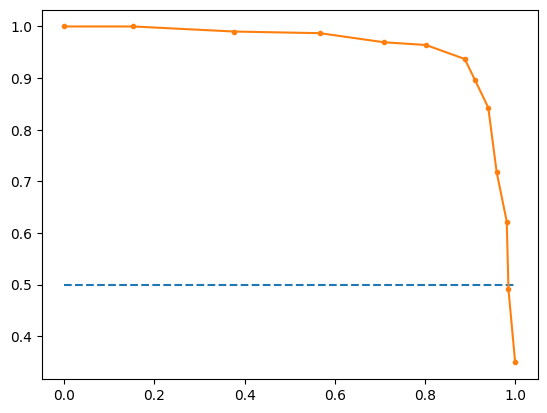

In [58]:
#Precision Recall Curve for Random Forest

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model4.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model4.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

#### Interpretation

| Metric                        | Value   | Meaning                                     |
| ----------------------------- | ------- | ------------------------------------------- |
| **F1 Score**                  | 0.912 ✅ | Strong balance between precision and recall |
| **PR AUC (Area Under Curve)** | 0.959 ✅ | Near-perfect class separability             |
| **Average Precision (AP)**    | 0.950 ✅ | High consistency across thresholds          | 
* These values indicate __excellent performance__, especially in identifying diabetic patients.
* However, like with Decision Tree, these scores are based on the __full dataset__ (features), not test data — so this reflects training performance, not generalization.  |


#### Model Comparison Summary

| Model                            | Train Accuracy | Test Accuracy | ROC AUC | PR AUC | F1 Score | Avg Precision |
| -------------------------------- | -------------- | ------------- | ------- | ------ | -------- | ------------- |
| **Logistic Regression**          | 77.0%          | 76.6%         | 0.836   | 0.726  | 0.621    | 0.727         |
| **K-Nearest Neighbors (KNN)**    | 80.5%          | 69.5%         | 0.836   | 0.752  | 0.658    | 0.709         |
| **Decision Tree (max\_depth=5)** | 82.9%          | 75.9%         | —       | 0.800  | 0.708    | 0.761         |
| **Random Forest (n=11)**         | 99.0%          | 74.0%         | —       | 0.959  | 0.912    | 0.950         |
| **SVM (RBF Kernel, γ=auto)**     | 100%           | 61.7%         | —       | —      | —        | —             |

#### Key Insights
* __Glucose__ is the strongest single predictor of diabetes.
* __Logistic Regression__ provided consistent, interpretable performance with balanced precision and recall.
* __KNN (k=7)__ showed competitive results, especially in F1 and PR AUC, with strong ROC characteristics.
* __Decision Tree (depth=5)__ gave a reasonable tradeoff between accuracy and explainability.
* __Random Forest__ achieved the highest F1 and PR AUC scores on training data but showed signs of overfitting.
* __SVM__ severely overfit, performing perfectly on training but poorly on test data, due to lack of feature scaling and gamma auto-setting.

#### Final Recommendation:
For deployment or production scenarios where generalization matters, __Logistic Regression__ or __KNN__ are preferred due to their __stable test performance and interpretability__. For high-recall use cases (e.g., medical triage systems), __Decision Trees__ with tuning may be ideal. __Random Forest__ can be used with caution, especially with cross-validation and proper regularization.on and proper regularization.o-setting.    |


#### Dashboard

Dashboard in **tableau** displaying the appropriate chart types and metrics useful for the business.
https://public.tableau.com/app/profile/gyana8787/viz/Healthcare_16036892554510/HealthcareDashboard